In [9]:
# ==============================================================================
# 1. SETUP & LIBRARY IMPORT
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Library Scikit-Learn untuk Modeling & Evaluasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Library berhasil di-import.")

✅ Library berhasil di-import.


In [10]:
# ==============================================================================
# 2. MEMUAT DATA PREPROCESSED
# ==============================================================================
# Lokasi data relative terhadap notebook ini (Mundur 3 folder)
DATA_PATH = "../../../data/"

try:
    print("📂 Sedang memuat data dari folder 'data/'...")

    # Load Data Latih (X_train & y_train - Sudah Balanced & Scaled)
    X_train = pd.read_csv(DATA_PATH + "X_train_final.csv")
    y_train = pd.read_csv(DATA_PATH + "y_train_final.csv").values.ravel() # ravel() agar jadi array 1D

    # Load Data Uji (X_test & y_test - Data Murni/Imbalanced)
    X_test = pd.read_csv(DATA_PATH + "X_test_final.csv")
    y_test = pd.read_csv(DATA_PATH + "y_test_final.csv").values.ravel()

    # Load Label Encoder untuk mengetahui nama asli kelas (0=Excellent, dst)
    le = joblib.load(DATA_PATH + "label_encoder.pkl")
    class_names = le.classes_

    print("✅ Data berhasil dimuat!")
    print(f"   - Data Latih : {X_train.shape[0]} baris, {X_train.shape[1]} fitur")
    print(f"   - Data Uji   : {X_test.shape[0]} baris")
    print(f"   - Target Label: {dict(zip(le.classes_, le.transform(le.classes_)))}")

except FileNotFoundError:
    print("❌ Error: File tidak ditemukan. Pastikan proses Save di Preprocessing sukses.")

📂 Sedang memuat data dari folder 'data/'...
✅ Data berhasil dimuat!
   - Data Latih : 45080 baris, 8 fitur
   - Data Uji   : 5091 baris
   - Target Label: {'Excellent': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), 'Marginal': np.int64(3)}


In [11]:
# ==============================================================================
# 3. PELATIHAN MODEL (MODEL TRAINING)
# ==============================================================================
print("🔄 Sedang melatih model Random Forest...")

# Inisialisasi Model
# n_estimators=100 : Menggunakan 100 pohon keputusan (Standar industri yang stabil)
# random_state=42  : Menjaga konsistensi hasil (Reproducible)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
rf_model.fit(X_train, y_train)

print("✅ Pelatihan Selesai! Model siap dievaluasi.")

🔄 Sedang melatih model Random Forest...
✅ Pelatihan Selesai! Model siap dievaluasi.


In [13]:
# ==============================================================================
# 4. EVALUASI MODEL
# ==============================================================================
print("📊 Mengevaluasi model pada Data Uji (Test Set)...")

# Prediksi Label
y_pred = rf_model.predict(X_test)

# A. Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Akurasi (Accuracy): {accuracy * 100:.2f}%")

# B. Laporan Klasifikasi Lengkap
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

📊 Mengevaluasi model pada Data Uji (Test Set)...

🔹 Akurasi (Accuracy): 99.57%

🔹 Classification Report:
              precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00      2818
        Fair       0.83      0.91      0.87        69
        Good       1.00      0.99      1.00      2188
    Marginal       1.00      0.88      0.93        16

    accuracy                           1.00      5091
   macro avg       0.96      0.95      0.95      5091
weighted avg       1.00      1.00      1.00      5091



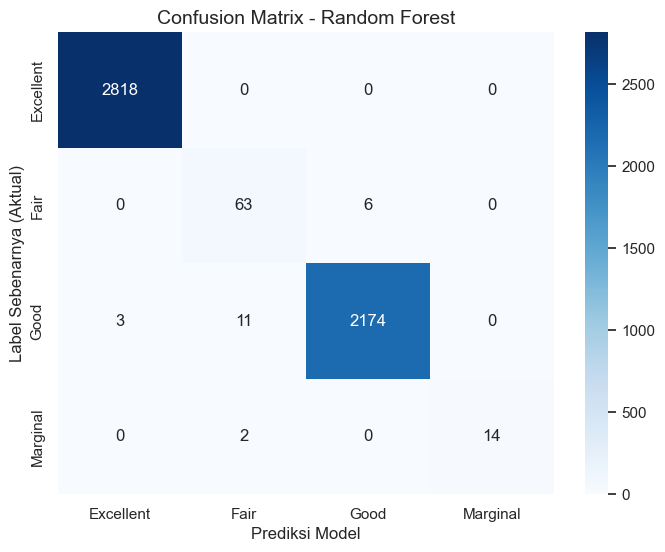

In [15]:
# ==============================================================================
# 5. VISUALISASI CONFUSION MATRIX
# ==============================================================================
plt.figure(figsize=(8, 6))

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Aktual)', fontsize=12)
plt.show()

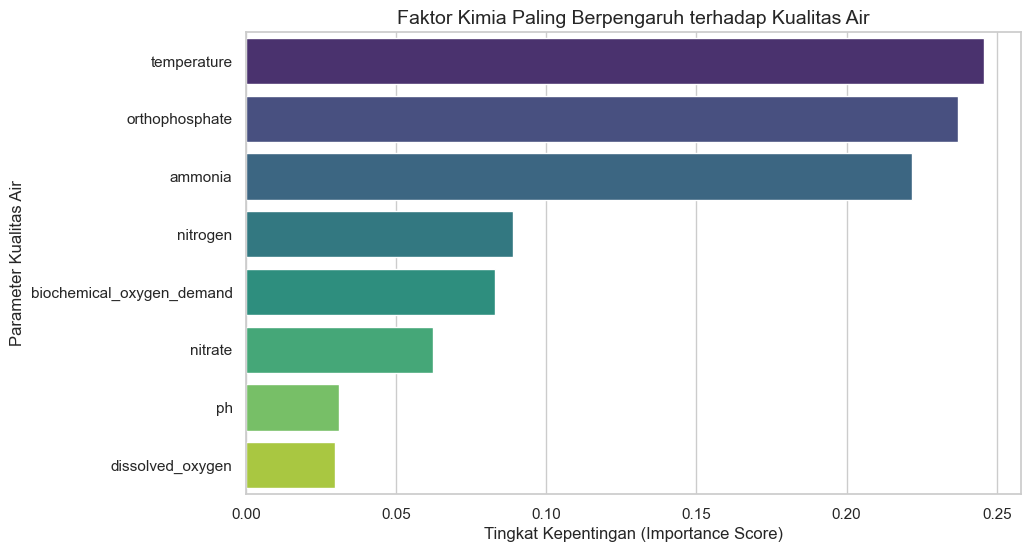

Analisis: Fitur paling atas adalah penentu utama kualitas air menurut model.


In [21]:
# ==============================================================================
# 6. ANALISIS PENTINGNYA FITUR (FEATURE IMPORTANCE)
# ==============================================================================
# Mengambil tingkat kepentingan fitur dari model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Membuat DataFrame untuk visualisasi
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis', hue='Feature', legend=False)
plt.title('Faktor Kimia Paling Berpengaruh terhadap Kualitas Air', fontsize=14)
plt.xlabel('Tingkat Kepentingan (Importance Score)')
plt.ylabel('Parameter Kualitas Air')
plt.show()

print("Analisis: Fitur paling atas adalah penentu utama kualitas air menurut model.")

✅ Gambar 'rf_tree_1_visual.png' berhasil disimpan.


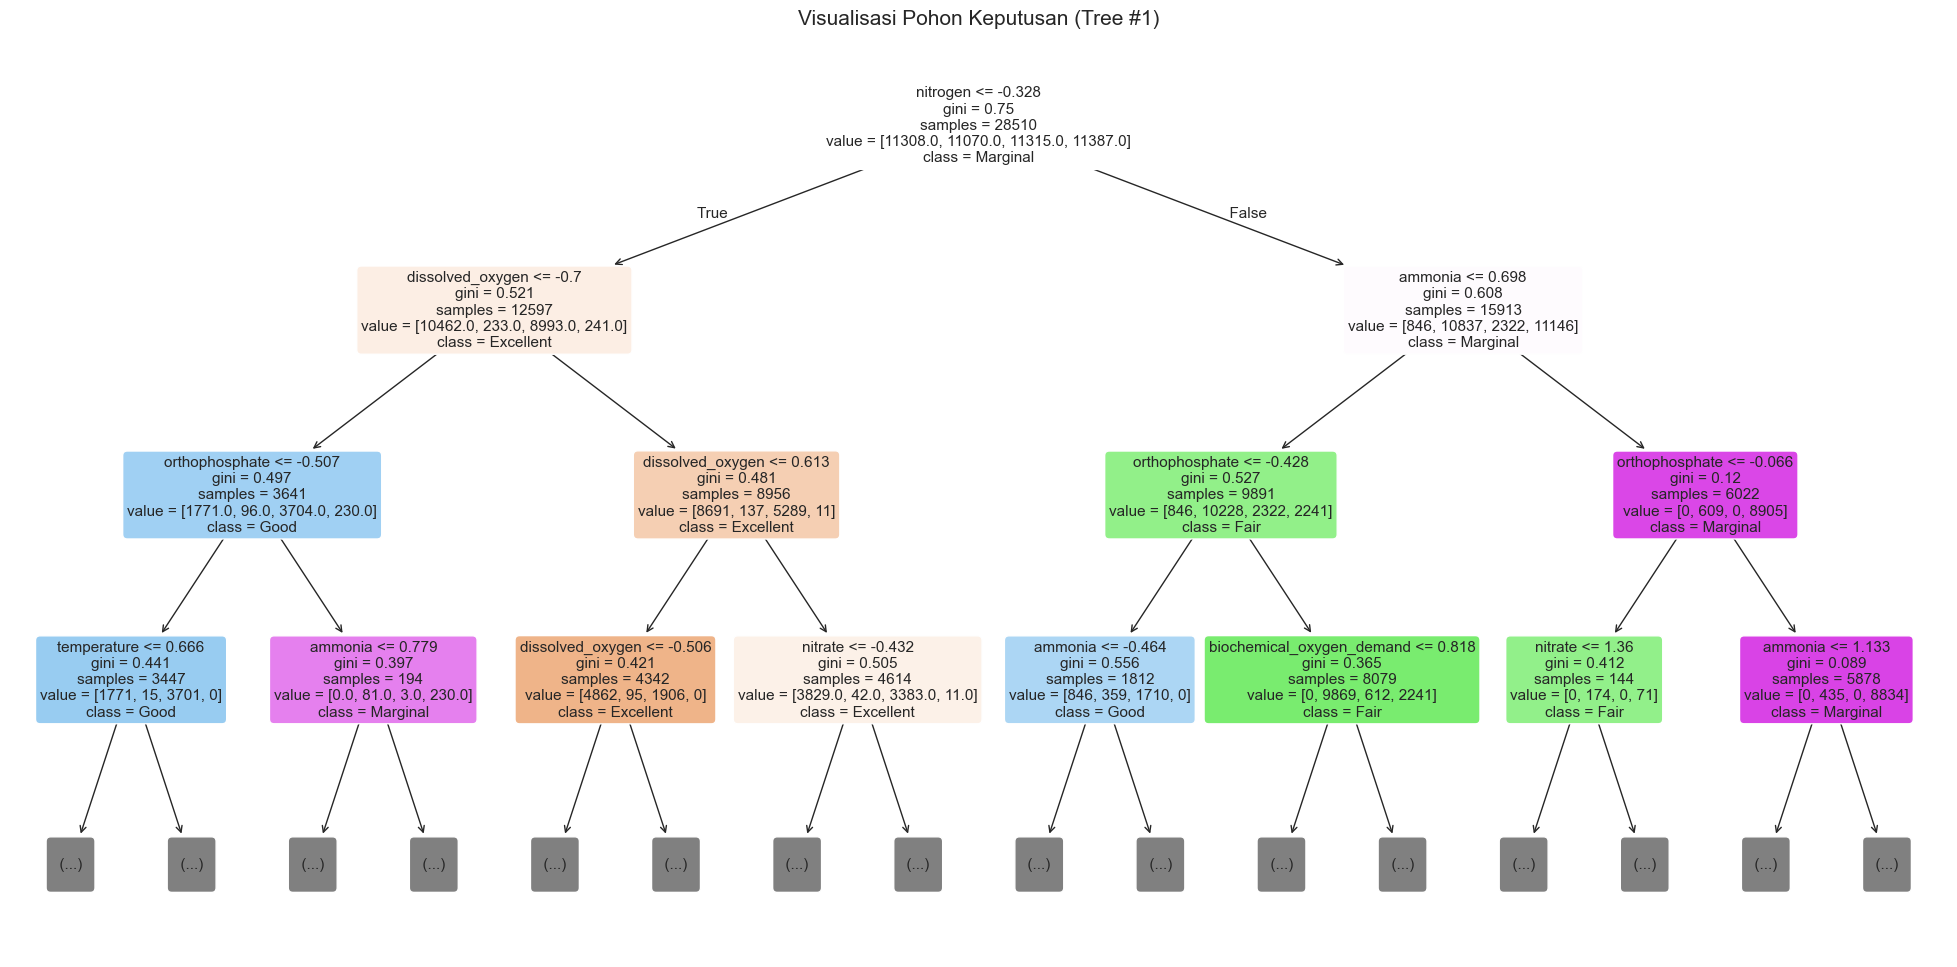

✅ Gambar 'rf_tree_50_visual.png' berhasil disimpan.


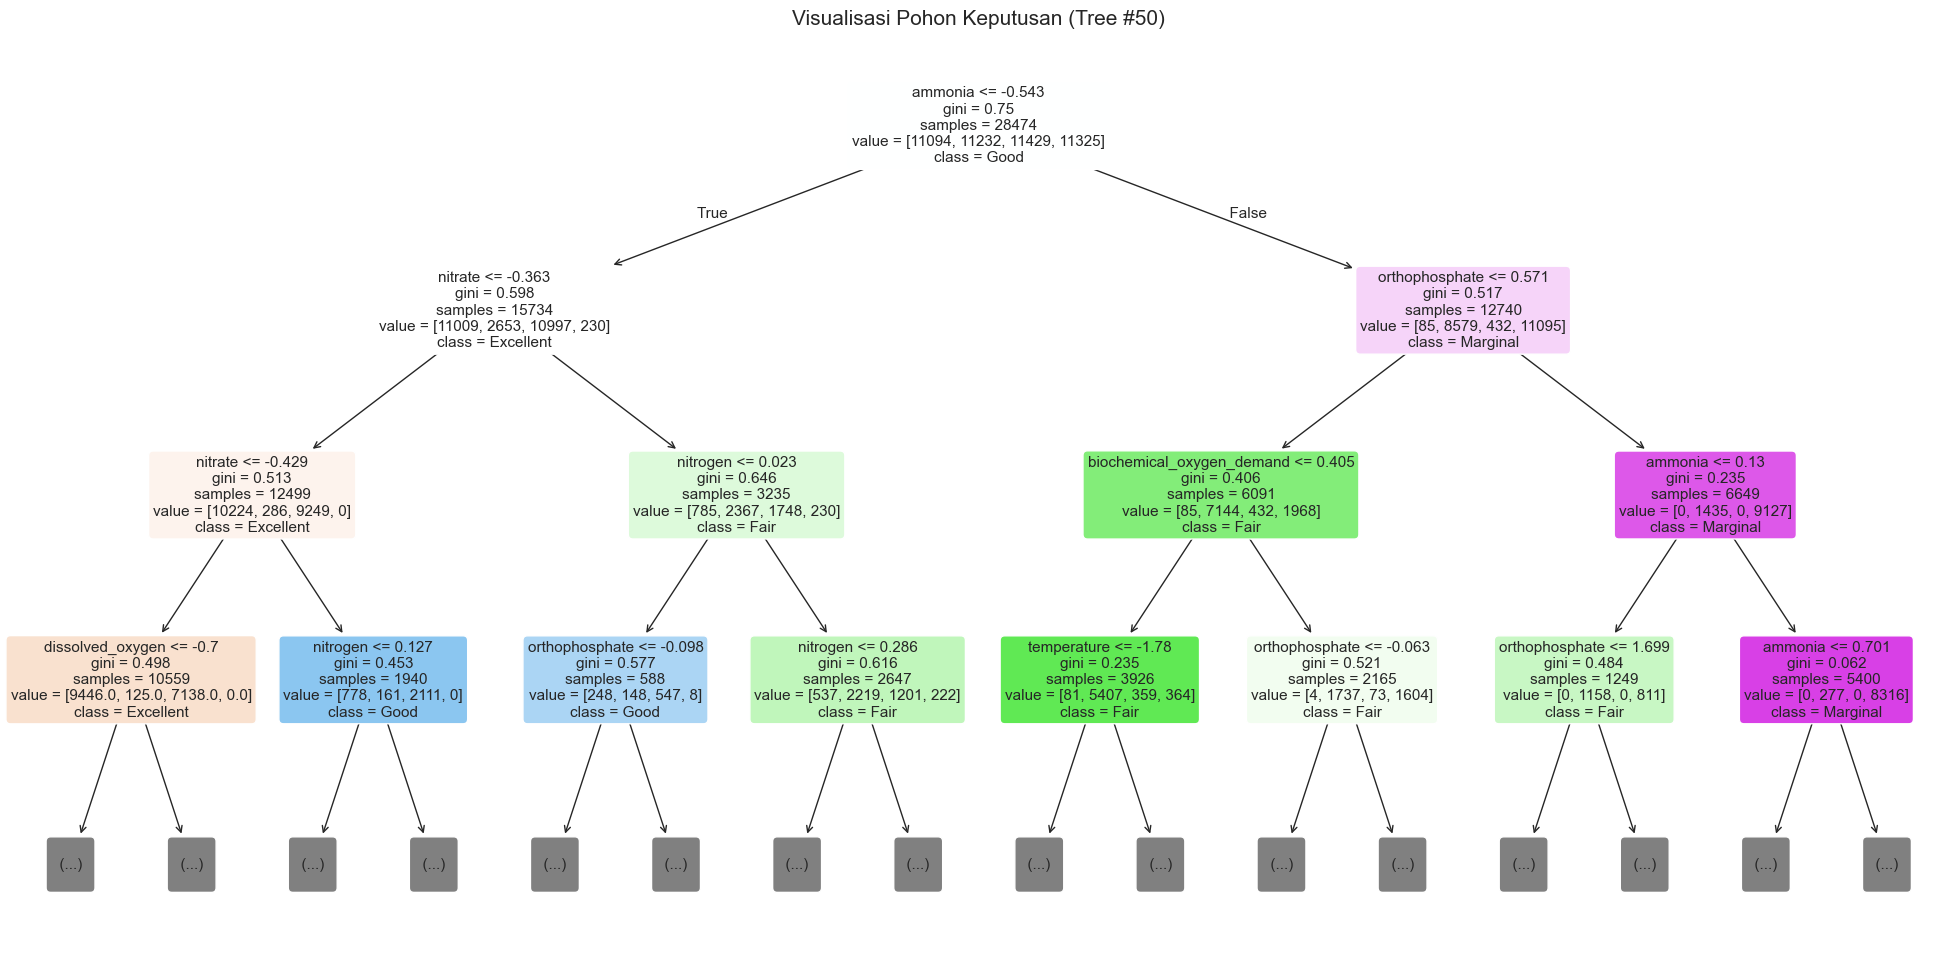


✅ Model berhasil disimpan sebagai: rf_model_final.pkl


In [25]:
# ==============================================================================
# 7. VISUALISASI & SIMPAN HASIL (GAMBAR + MODEL)
# ==============================================================================
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib

# A. Visualisasi & Simpan Pohon Pertama (Tree #0)
plt.figure(figsize=(25, 12))
plot_tree(rf_model.estimators_[0], 
          feature_names=X_train.columns,
          class_names=le.classes_,
          filled=True, rounded=True, max_depth=3, fontsize=11)

plt.title("Visualisasi Pohon Keputusan (Tree #1)", fontsize=15)

# Simpan gambar ke file PNG (dpi=300 biar HD/tidak pecah saat di-zoom)
plt.savefig('rf_tree_1_visual.png', dpi=300, bbox_inches='tight')
print("✅ Gambar 'rf_tree_1_visual.png' berhasil disimpan.")
plt.show()

# B. Visualisasi & Simpan Pohon Pembanding (Tree #50)
plt.figure(figsize=(25, 12))
plot_tree(rf_model.estimators_[50], 
          feature_names=X_train.columns,
          class_names=le.classes_,
          filled=True, rounded=True, max_depth=3, fontsize=11)

plt.title("Visualisasi Pohon Keputusan (Tree #50)", fontsize=15)
plt.savefig('rf_tree_50_visual.png', dpi=300, bbox_inches='tight')
print("✅ Gambar 'rf_tree_50_visual.png' berhasil disimpan.")
plt.show()

# C. Simpan Model Akhir (Export)
model_filename = 'rf_model_final.pkl'
joblib.dump(rf_model, model_filename)

print(f"\n✅ Model berhasil disimpan sebagai: {model_filename}")